In [1]:
from utility import label_yolo_to_csv
import pandas as pd
import glob
import os
YOLO_LABELS= r"C:\project\Computer_Vision\term_paper_2023\experiments\Anti UAV+ micro drone\generate\labels"
YOLO_IMAGES= r"C:\project\Computer_Vision\term_paper_2023\experiments\Anti UAV+ micro drone\generate\images"

YOLO_LABELS_2= r"C:\project\Computer_Vision\term_paper_2023\experiments\Anti UAV with small drone\generate\labels"
YOLO_IMAGES_2= r"C:\project\Computer_Vision\term_paper_2023\experiments\Anti UAV with small drone\generate\images"

YOLO_LABELS_3= r"C:\project\Computer_Vision\term_paper_2023\datasets\Anti_UAV_yolo\train\labels"
YOLO_IMAGES_3= r"C:\project\Computer_Vision\term_paper_2023\datasets\Anti_UAV_yolo\train\images"
# SAVE_PATH =  r"C:\project\Computer_Vision\term_paper_2023\AttentionGAN_dataset"

In [2]:
def delete_excess_yolo_labels(path_labels,path_images):
    path_labels = glob.glob(os.path.join(path_labels, "*.txt"))
    path_images = glob.glob(os.path.join(path_images, "*.jpg"))
    name_images = [ path.split('\\')[-1].split('.')[-2] for path in path_images]
    # print(name_images)
    count = 0
    for path in path_labels:
        name_label = path.split('\\')[-1].split('.')[-2]
        if  not name_label in name_images:
            count+=1
            os.remove(path)
            print(name_label)
    print(count)


In [3]:
# delete_excess_yolo_labels(YOLO_LABELS_2,YOLO_IMAGES_2)

count    677.000000
mean       0.000572
std        0.000223
min        0.000080
25%        0.000397
50%        0.000584
75%        0.000763
max        0.000965
Name: area, dtype: float64


<Axes: >

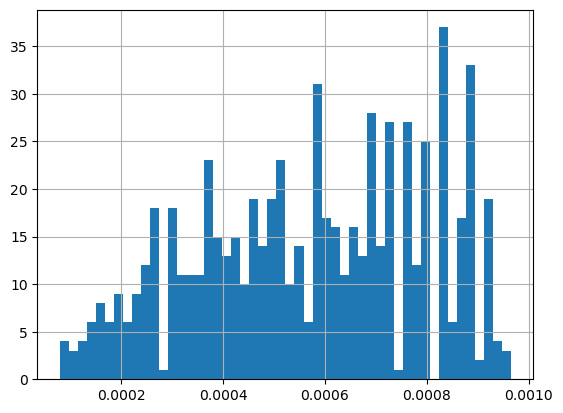

In [4]:
df = label_yolo_to_csv(YOLO_LABELS)
df['area'] = df.apply(lambda x : x.w*x.h, axis=1)
df['path_label'] = df['id_image'].apply(lambda id : os.path.join(YOLO_LABELS,f'{id}.txt'))
df['path_image'] = df['id_image'].apply(lambda id : os.path.join(YOLO_IMAGES,f'{id}.jpg'))
print(df['area'].describe())
df['area'].hist(bins=50)

In [5]:
512*512*0.0001

26.2144

In [6]:
sum(df['area']<0.0006)

351

count    1274.000000
mean        0.000734
std         0.000071
min         0.000610
25%         0.000687
50%         0.000732
75%         0.000778
max         0.000870
Name: area, dtype: float64


<Axes: >

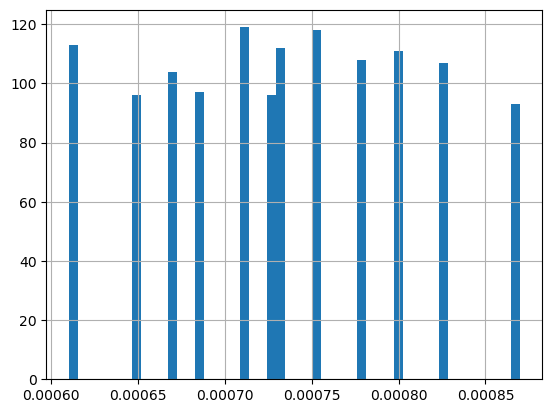

In [7]:
df = label_yolo_to_csv(YOLO_LABELS_2)
df['area'] = df.apply(lambda x : x.w*x.h, axis=1)
df['path_label'] = df['id_image'].apply(lambda id : os.path.join(YOLO_LABELS,f'{id}.txt'))
df['path_image'] = df['id_image'].apply(lambda id : os.path.join(YOLO_IMAGES,f'{id}.jpg'))
print(df['area'].describe())
df['area'].hist(bins=50)

count    5243.000000
mean        0.012530
std         0.053072
min         0.000019
25%         0.000254
50%         0.000472
75%         0.001221
max         0.701988
Name: area, dtype: float64


<Axes: >

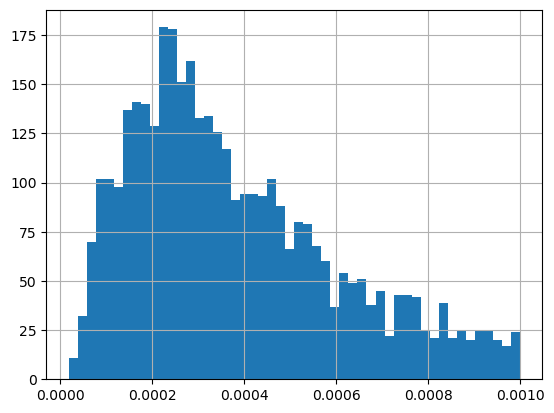

In [8]:
df = label_yolo_to_csv(YOLO_LABELS_3)
df['area'] = df.apply(lambda x : x.w*x.h, axis=1)
df['path_label'] = df['id_image'].apply(lambda id : os.path.join(YOLO_LABELS,f'{id}.txt'))
df['path_image'] = df['id_image'].apply(lambda id : os.path.join(YOLO_IMAGES,f'{id}.jpg'))
print(df['area'].describe())
df[df['area']<0.001]['area'].hist(bins=50)